In [1]:
"""
Name: Allegra Marsiglio
CS677 Term Project
Urinary biomarkers for pancreatic cancer
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/allegramarsiglio/Desktop/Debernardi et al 2020 data.csv")
df = df.drop(['patient_cohort', 'sample_origin', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9'], axis=1)
df

,sample_id,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,33,F,1,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,81,F,1,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,51,M,1,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,61,M,1,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,62,M,1,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...
585,S549,68,M,3,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,71,F,3,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,63,M,3,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,75,F,3,1.33458,8.206777,205.930000,722.523000,NaN


In [2]:
# Diagnosis counts
df['diagnosis'].value_counts(ascending = False)

2    208
3    199
1    183
Name: diagnosis, dtype: int64

In [3]:
# Cancer vs non-cancer
df['diagnosis_cancer'] = np.where(df['diagnosis'] == 3, 1, 0)
df['diagnosis_cancer'].value_counts(ascending = False)

0    391
1    199
Name: diagnosis_cancer, dtype: int64

In [9]:
# OTHER STATISTICS

# age
print(df['age'].describe(), '\n')

# sex
print(df['sex'].describe(),'\n', df['sex'].value_counts(), '\n')

# creatinine
print(df['creatinine'].describe(), '\n')

# LYVE1
print(df['LYVE1'].describe(), '\n')

# REG1B
print(df['REG1B'].describe(), '\n')

# TFF1
print(df['TFF1'].describe(), '\n')

count    590.000000
mean      59.079661
std       13.109520
min       26.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       89.000000
Name: age, dtype: float64 

count     590
unique      2
top         F
freq      299
Name: sex, dtype: object 
 F    299
M    291
Name: sex, dtype: int64 

count    590.000000
mean       0.855383
std        0.639028
min        0.056550
25%        0.373230
50%        0.723840
75%        1.139482
max        4.116840
Name: creatinine, dtype: float64 

count    590.000000
mean       3.063530
std        3.438796
min        0.000129
25%        0.167179
50%        1.649862
75%        5.205037
max       23.890323
Name: LYVE1, dtype: float64 

count     590.000000
mean      111.774090
std       196.267110
min         0.001104
25%        10.757216
50%        34.303353
75%       122.741013
max      1403.897600
Name: REG1B, dtype: float64 

count      590.000000
mean       597.868722
std       1010.477245
min          0.005293
25%         43

,age,creatinine,LYVE1,REG1B,TFF1
age,1.000000,-0.069393,0.329805,0.204317,0.207868
creatinine,-0.069393,1.000000,0.338533,0.261906,0.397795
LYVE1,0.329805,0.338533,1.000000,0.543075,0.577363
REG1B,0.204317,0.261906,0.543075,1.000000,0.690228
TFF1,0.207868,0.397795,0.577363,0.690228,1.000000


The features that have an absolute correlation higher than 0.40 are:
• LYVE1 - REG1B : 0.54
• LYVE1 - TFF1 : 0.58
• REG1B - TFF1 : 0.69


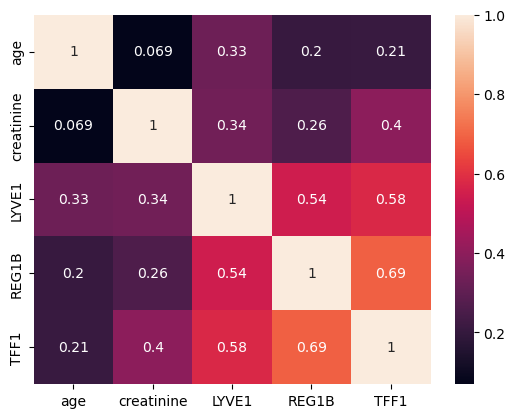

In [113]:
# FEATURES CORRELATION

features = ['age', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']

corr_matrix = df[features].corr(numeric_only = True)
display(corr_matrix)

sns.heatmap(corr_matrix.abs(), xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)

plt.savefig("/Users/allegramarsiglio/Desktop/BU/Classes SPRING 23/CS677 Data Science with Python/Term Project/corr_matrix.pdf", 
            format = 'pdf')

print('The features that have an absolute correlation higher than 0.40 are:')

for row in range(0, 4):
    for column in range(1, 5):
        if column > row:
            if (corr_matrix.abs().iloc[row, column] > 0.40):
                print('•', corr_matrix.abs().index[row], '-', corr_matrix.abs().columns[column], 
                      ':', round(corr_matrix.iloc[row, column] , 2))

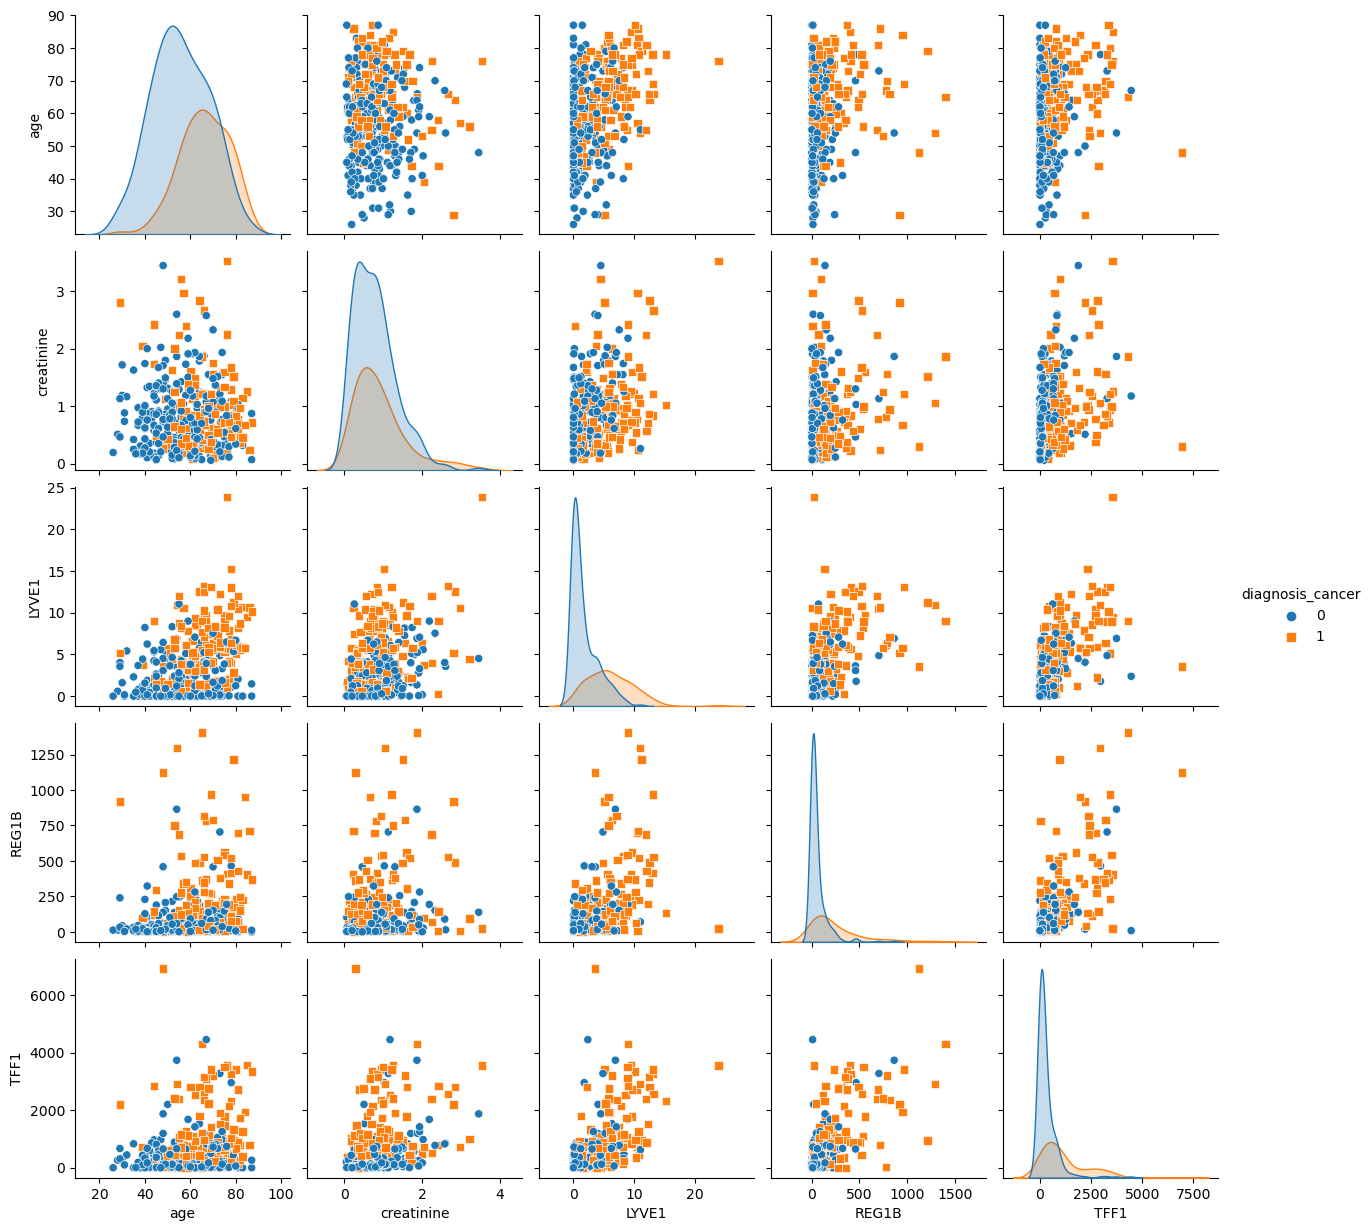

In [115]:
# FEATURES CORRELATION

from sklearn.model_selection import train_test_split

features = ['age', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'diagnosis_cancer']

x_train, x_test = train_test_split(df[features], test_size=0.35, random_state=123)

x_train_0 = x_train[x_train['diagnosis_cancer']==0]
x_train_1 = x_train[x_train['diagnosis_cancer']==1]

fig = sns.pairplot(x_train, hue = 'diagnosis_cancer', markers=["o", "s"])

plt.savefig("/Users/allegramarsiglio/Desktop/BU/Classes SPRING 23/CS677 Data Science with Python/Term Project/pairplot.pdf", 
            format = 'pdf')

plt.show()

In [6]:
# MULTICOLLINEARITY MEASURE: Variance Inflation Factors (VIF)

# If the value of VIF is:
# - 1 => not correlated. Multicollinearity doesn’t exist.
# - Between 1 and 5 => moderately correlated. Low multicollinearity exists.
# - Greater than 5 => Highly correlated. High Multicollinearity exists.

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for sex
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

# independent variables set
features = ['age', 'sex', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
x = df[features]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
  
print(vif_data)

      feature       VIF
0         age  3.320921
1         sex  2.045946
2  creatinine  3.077264
3       LYVE1  3.099881
4       REG1B  2.721350
5        TFF1  3.094782


The Accuracy of the Decision Tree classifier on the test data is: 77.78 %
The Sensitivity (TPR) of the Decision Tree classifier on the test data is: 0.56
The Sensitivity (TNR) of the Decision Tree classifier on the test data is: 0.88
The AUC score of the Decision Tree classifier on the test data is: 0.72

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True')

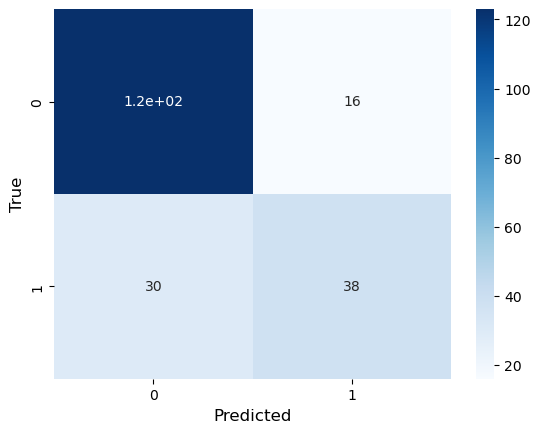

In [12]:
# 1) DECISION TREE

from sklearn import tree

# creating x and y
features = ['age', 'sex', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
x = df[features].values
y = df['diagnosis_cancer'].values

# splitting in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=123)

# split the model
tree_classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
tree_classifier.fit(x_train, y_train)

# compute accuracy
prediction_tree = tree_classifier.predict(x_test)
accuracy_tree = np.mean(prediction_tree == y_test)
print('The Accuracy of the Decision Tree classifier on the test data is:', round(accuracy_tree*100, 2), '%')

# compute confusion matrix, tpr and tnr
from sklearn.metrics import confusion_matrix

cf_matrix_tree = confusion_matrix(y_test, prediction_tree)

tp_tree = cf_matrix_tree[1][1]
fp_tree = cf_matrix_tree[0][1]
tn_tree = cf_matrix_tree[0][0]
fn_tree = cf_matrix_tree[1][0]

tpr_tree = (tp_tree)/(tp_tree + fn_tree)
tnr_tree = (tn_tree)/(tn_tree + fp_tree)

print('The Sensitivity (TPR) of the Decision Tree classifier on the test data is:', round(tpr_tree, 2))
print('The Sensitivity (TNR) of the Decision Tree classifier on the test data is:', round(tnr_tree, 2))

# compute AUC score
from sklearn import metrics
auc_tree = metrics.roc_auc_score(y_test, prediction_tree)
print('The AUC score of the Decision Tree classifier on the test data is:', round(auc_tree, 2))

print("\nConfusion Matrix:")
sns.heatmap(cf_matrix_tree, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


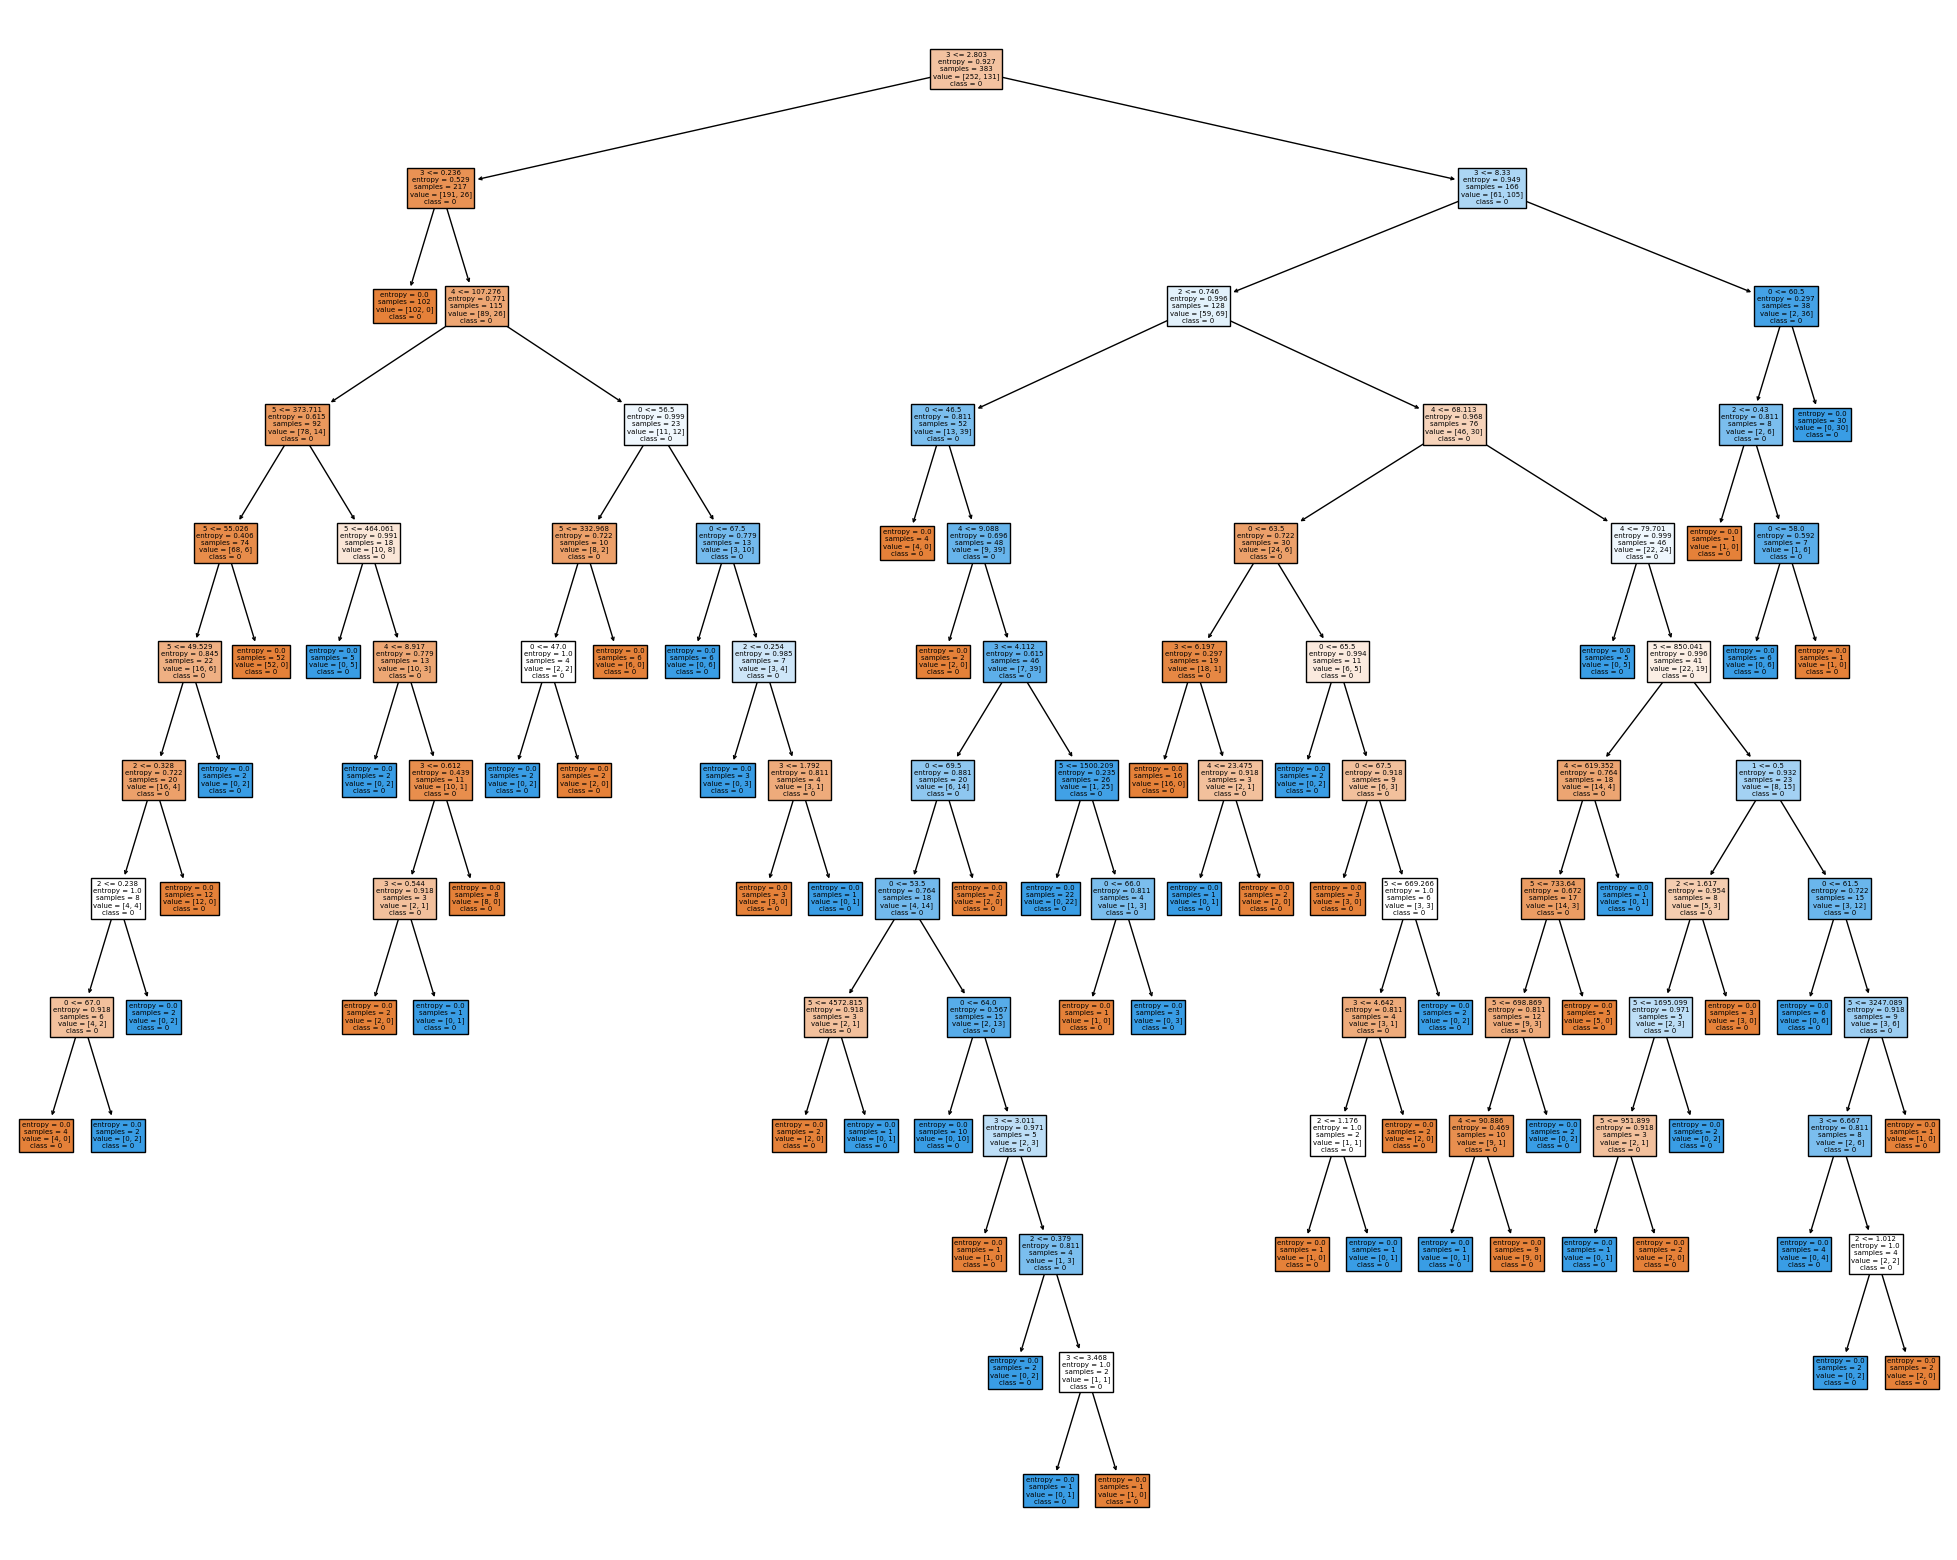

In [17]:
# PLOT OF THE DECISION TREE

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_classifier, 
                   feature_names=df[features].index.astype(str),  
                   class_names=df['diagnosis_cancer'].astype(str),
                   filled=True)

plt.savefig("/Users/allegramarsiglio/Desktop/BU/Classes SPRING 23/CS677 Data Science with Python/Term Project/decision_tree.pdf", 
            format = 'pdf')


In [24]:
# DEPTH and LEAVES

depth = tree_classifier.get_depth()
leaves = tree_classifier.get_n_leaves()

print('The depth of the tree is:', depth)
print('The number of leaves of the tree is:', leaves)


The depth of the tree is: 12
The number of leaves of the tree is: 60


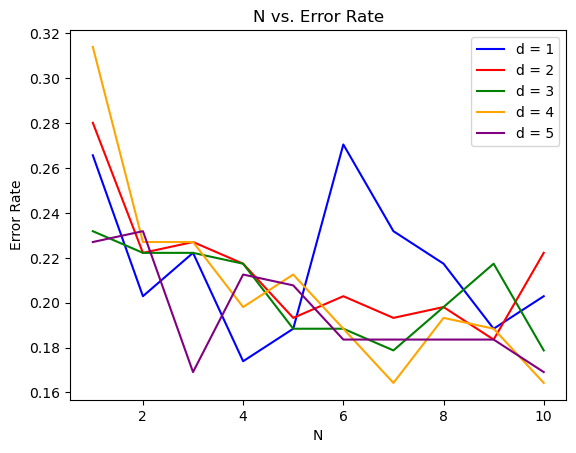

In [39]:
# 2) RANDOM FOREST (pt 1/2)

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# creating x and y
features = ['age', 'sex', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
x = df[features].values
y = df['diagnosis_cancer'].values

# splitting in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=234)

# look for optimal n and d
n_subtrees = range(1,10+1)
max_depths = range(1,5+1)

find_n_d = pd.DataFrame(columns = ['N', 'd', 'error_rate'])

for n in n_subtrees:
    for d in max_depths:
        model = RandomForestClassifier(n_estimators = n, max_depth = d, criterion = 'entropy')
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        error_rate = np.mean(prediction != y_test)
        
        find_n_d.loc[len(find_n_d.index)] = [n, d, error_rate]

find_n_d['N'] = find_n_d['N'].astype(int)
find_n_d['d'] = find_n_d['d'].astype(int)

line1, = plt.plot(find_n_d[find_n_d['d']==1]['N'], find_n_d[find_n_d['d']==1]['error_rate'], 
                  color = 'blue', label = 'd = 1')
line2, = plt.plot(find_n_d[find_n_d['d']==2]['N'], find_n_d[find_n_d['d']==2]['error_rate'], 
                  color = 'red', label = 'd = 2')
line3, = plt.plot(find_n_d[find_n_d['d']==3]['N'], find_n_d[find_n_d['d']==3]['error_rate'], 
                  color = 'green', label = 'd = 3')
line4, = plt.plot(find_n_d[find_n_d['d']==4]['N'], find_n_d[find_n_d['d']==4]['error_rate'], 
                  color = 'orange', label = 'd = 4')
line5, = plt.plot(find_n_d[find_n_d['d']==5]['N'], find_n_d[find_n_d['d']==5]['error_rate'], 
                  color = 'purple', label = 'd = 5')

plt.legend(handles=[line1, line2, line3, line4, line5])
plt.xlabel("N")
plt.ylabel("Error Rate")
plt.title('N vs. Error Rate')

plt.savefig("/Users/allegramarsiglio/Desktop/BU/Classes SPRING 23/CS677 Data Science with Python/Term Project/n_vs_error_rate.pdf", 
            format = 'pdf')

plt.show()


The Accuracy of the Random Forest classifier with n = 8 and d = 5 on the test data is: 82.13 %
The Sensitivity (TPR) of the Random Forest classifier on the test data is: 0.75
The Sensitivity (TNR) of the Random Forest classifier on the test data is: 0.82
The AUC score of the Random Forest classifier on the test data is: 0.79

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True')

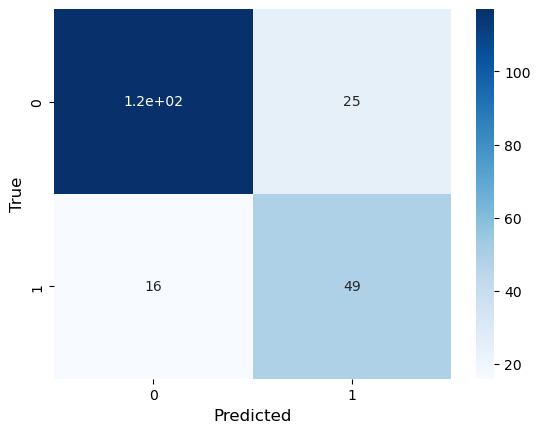

In [9]:
# 2) RANDOM FOREST (pt 2/2) 

optimal_n = find_n_d[find_n_d['error_rate'] == find_n_d['error_rate'].min()]['N'].iloc[0]
optimal_d = find_n_d[find_n_d['error_rate'] == find_n_d['error_rate'].min()]['d'].iloc[0]

# fit the model using optimal n and d
model = RandomForestClassifier(n_estimators = optimal_n, max_depth = optimal_d, criterion = 'entropy')
model.fit(x_train, y_train)

# compute accuracy
prediction_rf = model.predict(x_test)
accuracy_rf = np.mean(prediction == y_test)
print('The Accuracy of the Random Forest classifier with n =', optimal_n,
      'and d =', optimal_d, 'on the test data is:', round(accuracy_rf*100, 2), '%')

# compute confusion matrix, tpr and tnr
from sklearn.metrics import confusion_matrix

cf_matrix_rf = confusion_matrix(y_test, prediction_rf)

tp_rf = cf_matrix_rf[1][1]
fp_rf = cf_matrix_rf[0][1]
tn_rf = cf_matrix_rf[0][0]
fn_rf = cf_matrix_rf[1][0]

tpr_rf = (tp_rf)/(tp_rf + fn_rf)
tnr_rf = (tn_rf)/(tn_rf + fp_rf)

print('The Sensitivity (TPR) of the Random Forest classifier on the test data is:', round(tpr_rf, 2))
print('The Sensitivity (TNR) of the Random Forest classifier on the test data is:', round(tnr_rf, 2))

# compute AUC score
from sklearn import metrics
auc_rf = metrics.roc_auc_score(y_test, prediction_rf)
print('The AUC score of the Random Forest classifier on the test data is:', round(auc_rf, 2))

print("\nConfusion Matrix:")
sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


The Accuracy of the Linear SVM classifier on the test data is: 79.71 %
The Sensitivity (TPR) of the Linear SVM classifier on the test data is: 0.56
The Sensitivity (TNR) of the Linear SVM classifier on the test data is: 0.92
The AUC score of the Linear SVM classifier on the test data is: 0.74

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True')

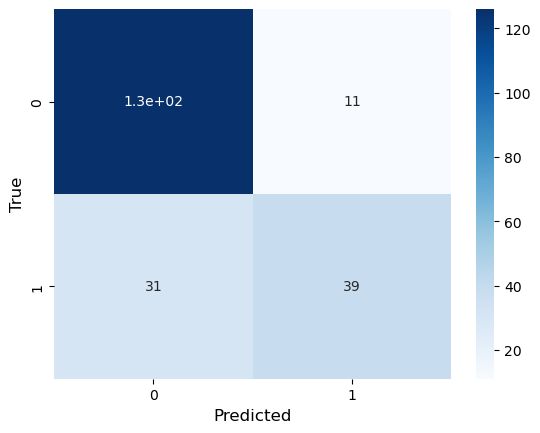

In [54]:
# SVM - LINEAR

# creating x and y
features = ['age', 'sex', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
x = df[features].values
y = df['diagnosis_cancer'].values

# scaling x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# splitting in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=456)

# fit the model
from sklearn import svm
svm_classifier_linear = svm.SVC(kernel = 'linear')
svm_classifier_linear.fit(x_train, y_train)

# compute accuracy
prediction_linear = svm_classifier_linear.predict(x_test)
accuracy_linear = np.mean(prediction_linear == y_test)
print('The Accuracy of the Linear SVM classifier on the test data is:', round(accuracy_linear*100, 2), '%')

# compute confusion matrix, tpr and tnr
from sklearn.metrics import confusion_matrix

cf_matrix_linear = confusion_matrix(y_test, prediction_linear)

tp_linear = cf_matrix_linear[1][1]
fp_linear = cf_matrix_linear[0][1]
tn_linear = cf_matrix_linear[0][0]
fn_linear = cf_matrix_linear[1][0]

tpr_linear = (tp_linear)/(tp_linear + fn_linear)
tnr_linear = (tn_linear)/(tn_linear + fp_linear)

print('The Sensitivity (TPR) of the Linear SVM classifier on the test data is:', round(tpr_linear, 2))
print('The Sensitivity (TNR) of the Linear SVM classifier on the test data is:', round(tnr_linear, 2))

# compute AUC score
from sklearn import metrics
auc_linear = metrics.roc_auc_score(y_test, prediction_linear)
print('The AUC score of the Linear SVM classifier on the test data is:', round(auc_linear, 2))

print("\nConfusion Matrix:")
sns.heatmap(cf_matrix_linear, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


The Accuracy of the Gaussian SVM classifier on the test data is: 82.61 %
The Sensitivity (TPR) of the Gaussian SVM classifier on the test data is: 0.59
The Sensitivity (TNR) of the Gaussian SVM classifier on the test data is: 0.93
The AUC score of the Gaussian SVM classifier on the test data is: 0.76

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True')

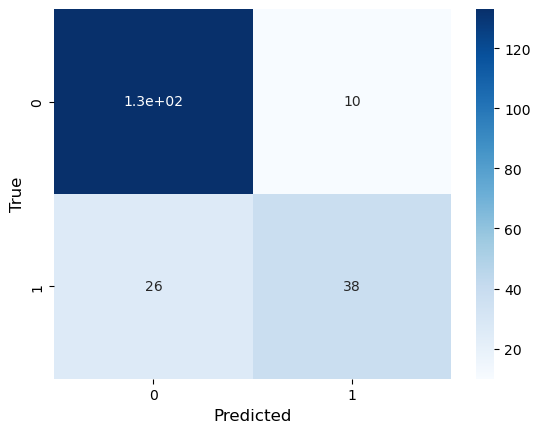

In [78]:
# SVM - GAUSSIAN

# creating x and y
features = ['age', 'sex', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
x = df[features].values
y = df['diagnosis_cancer'].values

# scaling x
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# splitting in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=567)

# fit the model
from sklearn import svm
svm_classifier_gauss = svm.SVC(kernel = 'rbf')
svm_classifier_gauss.fit(x_train, y_train)

# compute accuracy
prediction_gauss = svm_classifier_gauss.predict(x_test)
accuracy_gauss = np.mean(prediction_gauss == y_test)
print('The Accuracy of the Gaussian SVM classifier on the test data is:', round(accuracy_gauss*100, 2), '%')

# compute confusion matrix, tpr and tnr
from sklearn.metrics import confusion_matrix

cf_matrix_gauss = confusion_matrix(y_test, prediction_gauss)

tp_gauss = cf_matrix_gauss[1][1]
fp_gauss = cf_matrix_gauss[0][1]
tn_gauss = cf_matrix_gauss[0][0]
fn_gauss = cf_matrix_gauss[1][0]

tpr_gauss = (tp_gauss)/(tp_gauss + fn_gauss)
tnr_gauss = (tn_gauss)/(tn_gauss + fp_gauss)

print('The Sensitivity (TPR) of the Gaussian SVM classifier on the test data is:', round(tpr_gauss, 2))
print('The Sensitivity (TNR) of the Gaussian SVM classifier on the test data is:', round(tnr_gauss, 2))

# compute AUC score
from sklearn import metrics
auc_gauss = metrics.roc_auc_score(y_test, prediction_gauss)
print('The AUC score of the Gaussian SVM classifier on the test data is:', round(auc_gauss, 2))

print("\nConfusion Matrix:")
sns.heatmap(cf_matrix_gauss, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


The Accuracy of the Polynomial degree 3 SVM classifier on the test data is: 74.4 %
The Sensitivity (TPR) of the Polynomial degree 3 SVM classifier on the test data is: 0.37
The Sensitivity (TNR) of the Polynomial degree 3 SVM classifier on the test data is: 0.96
The AUC score of the Polynomial degree 3 SVM classifier on the test data is: 0.67

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True')

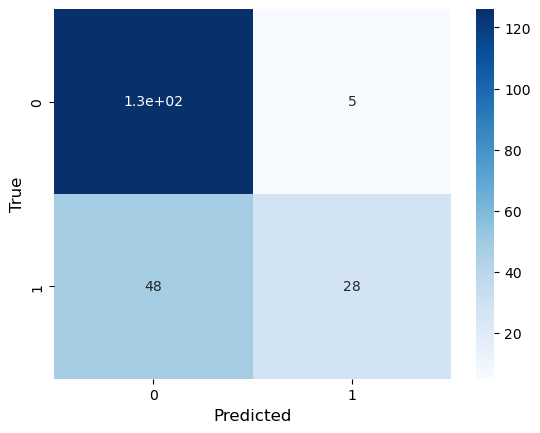

In [79]:
# SVM - POLYNOMIAL DEGREE 3

# creating x and y
features = ['age', 'sex', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
x = df[features].values
y = df['diagnosis_cancer'].values

# scaling x
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# splitting in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=678)

# fit the model
from sklearn import svm
svm_classifier_poly = svm.SVC(kernel = 'poly', degree = 3)
svm_classifier_poly.fit(x_train, y_train)

# compute accuracy
prediction_poly = svm_classifier_poly.predict(x_test)
accuracy_poly = np.mean(prediction_poly == y_test)
print('The Accuracy of the Polynomial degree 3 SVM classifier on the test data is:', round(accuracy_poly*100, 2), '%')

# compute confusion matrix, tpr and tnr
from sklearn.metrics import confusion_matrix

cf_matrix_poly = confusion_matrix(y_test, prediction_poly)

tp_poly = cf_matrix_poly[1][1]
fp_poly = cf_matrix_poly[0][1]
tn_poly = cf_matrix_poly[0][0]
fn_poly = cf_matrix_poly[1][0]

tpr_poly = (tp_poly)/(tp_poly + fn_poly)
tnr_poly = (tn_poly)/(tn_poly + fp_poly)

print('The Sensitivity (TPR) of the Polynomial degree 3 SVM classifier on the test data is:', round(tpr_poly, 2))
print('The Sensitivity (TNR) of the Polynomial degree 3 SVM classifier on the test data is:', round(tnr_poly, 2))

# compute AUC score
from sklearn import metrics
auc_poly = metrics.roc_auc_score(y_test, prediction_poly)
print('The AUC score of the Polynomial degree 3 SVM classifier on the test data is:', round(auc_poly, 2))

print("\nConfusion Matrix:")
sns.heatmap(cf_matrix_poly, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)



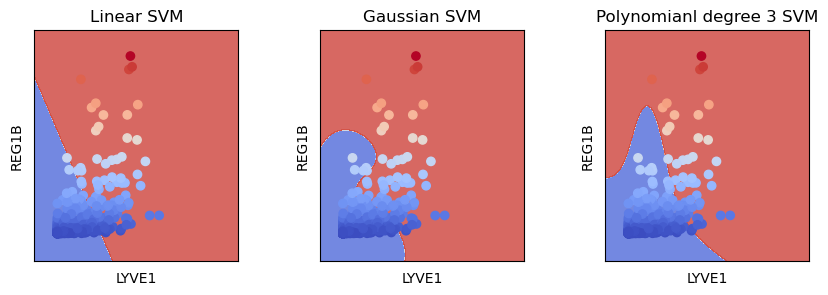

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
x=x_train[:, 3]
y=x_train[:, 4] 

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

# create a mesh to plot in
x_min, x_max = x_train[:, 3].min() - 1, x_train[:, 4].max() + 1
y_min, y_max = x_train[:, 4].min() - 1, x_train[:, 4].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear SVM',
          'Gaussian SVM',
          'Polynomianl degree 3 SVM']

plt.figure(figsize=(10, 3))

for i, clf in enumerate((svm_classifier_linear, svm_classifier_gauss, svm_classifier_poly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    clf.fit(np.c_[x, y], y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x_train[:, 3], x_train[:, 4], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('LYVE1')
    plt.ylabel('REG1B')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.savefig("/Users/allegramarsiglio/Desktop/BU/Classes SPRING 23/CS677 Data Science with Python/Term Project/SVM.pdf", 
            format = 'pdf')

plt.show()

The Accuracy of the Logistic Regression classifier on the test data is: 79.23 %
The Sensitivity (TPR) of the Logistic Regression classifier on the test data is: 0.62
The Specificity (TNR) of the Logistic Regression classifier on the test data is: 0.88
The AUC score of the Logistic Regression classifier on the test data is: 0.75

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True')

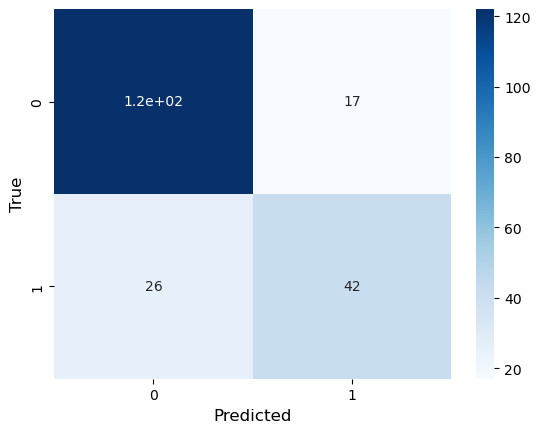

In [104]:
# LOGISTIC REGRESSION

# creating x and y
features = ['age', 'sex', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
x = df[features].values
y = df['diagnosis_cancer'].values

# scaling x
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# splitting in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=789)

# fit the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(x_train, y_train)

# compute accuracy
prediction_lr = log_reg_classifier.predict(x_test)
accuracy_lr = np.mean(prediction_lr == y_test)
print('The Accuracy of the Logistic Regression classifier on the test data is:', round(accuracy_lr*100, 2), '%')

# compute confusion matrix, tpr and tnr
from sklearn.metrics import confusion_matrix

cf_matrix_lr = confusion_matrix(y_test, prediction_lr)

tp_lr = cf_matrix_lr[1][1]
fp_lr = cf_matrix_lr[0][1]
tn_lr = cf_matrix_lr[0][0]
fn_lr = cf_matrix_lr[1][0]

tpr_lr = (tp_lr)/(tp_lr + fn_lr)
tnr_lr = (tn_lr)/(tn_lr + fp_lr)

print('The Sensitivity (TPR) of the Logistic Regression classifier on the test data is:', round(tpr_lr, 2))
print('The Specificity (TNR) of the Logistic Regression classifier on the test data is:', round(tnr_lr, 2))

# compute AUC score
from sklearn import metrics
auc_lr = metrics.roc_auc_score(y_test, prediction_lr)
print('The AUC score of the Logistic Regression classifier on the test data is:', round(auc_lr, 2))

print("\nConfusion Matrix:")
sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


In [111]:
#define the predictor variable and the response variable
x = df[features].values.ravel()
y = df['diagnosis_cancer'].values.ravel()

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3540 and the array at index 1 has size 590

Eigenvalues:
[2.59319201 1.11836209 0.92025545 0.66039406 0.43002897 0.28795418]

Variances (Percentage):
[43.14661277 18.60777604 15.31159486 10.9879125   7.15500179  4.79110204]



Text(0, 0.5, 'Explained variance (%)')

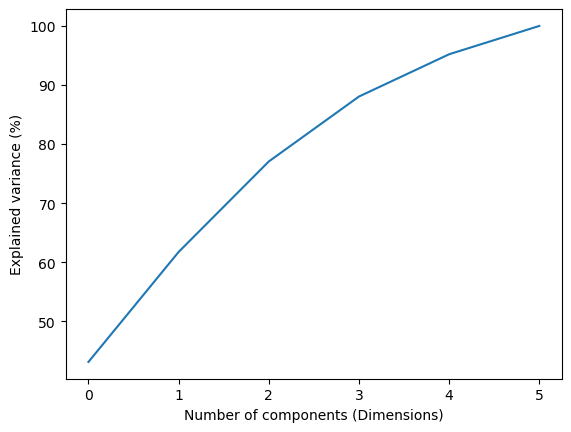

In [23]:
# LOGISTIC REGRESSION WITH PCA (pt 1/3)

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# apply PCA on all components
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(x_scaled)

# get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

          0         1         2         3         4
0 -0.567768  1.944313  1.881086 -0.339868  0.111071
1 -0.141520 -1.459614  0.215543 -1.116516  0.664708
2 -0.518349  0.906878 -0.703720  0.571107  0.494597
3 -0.682924  0.314603 -1.098419  0.141477  0.615920
4 -0.962966 -0.156992 -1.306657  0.612840  0.449697

Size: 
(590, 5)


<AxesSubplot: >

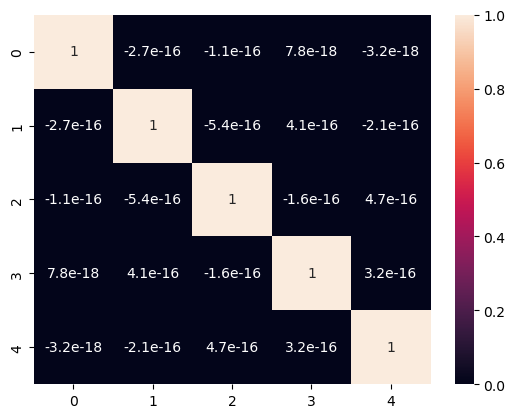

In [29]:
# LOGISTIC REGRESSION WITH PCA (pt 2/3)

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# apply PCA on 4 components
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_scaled)

# get the transformed dataset
x_pca = pd.DataFrame(x_pca)
print(x_pca.head())
print("\nSize: ")
print(x_pca.shape)

fig = plt.figure()
sns.heatmap(x_pca.corr(), 
            annot=True)

The Accuracy of the Logistic Regression classifier after PCA on the test data is: 80.68 %
The Sensitivity (TPR) of the Logistic Regression classifier after PCA on the test data is: 0.63
The Specificity (TNR) of the Logistic Regression classifier after PCA on the test data is: 0.89
The AUC score of the Logistic Regression classifier after PCA on the test data is: 0.76

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True')

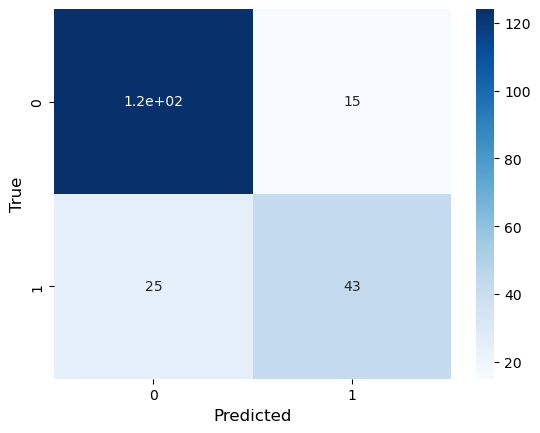

In [30]:
# LOGISTIC REGRESSION WITH PCA (pt 3/3)

# splitting in train and test
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.35, random_state=789)

# fit the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(x_train_pca, y_train)

# compute accuracy
prediction_lr_pca = log_reg_classifier.predict(x_test_pca)
accuracy_lr_pca = np.mean(prediction_lr_pca == y_test)
print('The Accuracy of the Logistic Regression classifier after PCA on the test data is:', 
      round(accuracy_lr_pca*100, 2), '%')

# compute confusion matrix, tpr and tnr
from sklearn.metrics import confusion_matrix

cf_matrix_lr_pca = confusion_matrix(y_test, prediction_lr_pca)

tp_lr_pca = cf_matrix_lr_pca[1][1]
fp_lr_pca = cf_matrix_lr_pca[0][1]
tn_lr_pca = cf_matrix_lr_pca[0][0]
fn_lr_pca = cf_matrix_lr_pca[1][0]

tpr_lr_pca = (tp_lr_pca)/(tp_lr_pca + fn_lr_pca)
tnr_lr_pca = (tn_lr_pca)/(tn_lr_pca + fp_lr_pca)

print('The Sensitivity (TPR) of the Logistic Regression classifier after PCA on the test data is:', 
      round(tpr_lr_pca, 2))
print('The Specificity (TNR) of the Logistic Regression classifier after PCA on the test data is:', 
      round(tnr_lr_pca, 2))

# compute AUC score
from sklearn import metrics
auc_lr_pca = metrics.roc_auc_score(y_test, prediction_lr_pca)
print('The AUC score of the Logistic Regression classifier after PCA on the test data is:', 
      round(auc_lr_pca, 2))

print("\nConfusion Matrix:")
sns.heatmap(cf_matrix_lr_pca, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


In [21]:
# COMPARISON

metrics = pd.DataFrame(columns = ['TP', 'FP', 'TN', 'FN', 'accuracy', 'TPR', 'TNR', 'AUC score'], 
                       index = ['Decision Tree', 'Random Forest', 
                                'Linear SVM', 'Gaussian SVM', 'Degree 3 SVM',
                                'Logistic Regression', 'Logistic Regression after PCA'])

metrics.loc['Decision Tree'] = [tp_tree, fp_tree, tn_tree, fn_tree, 
                                accuracy_tree, tpr_tree, tnr_tree, auc_tree]
metrics.loc['Random Forest'] = [tp_rf, fp_rf, tn_rf, fn_rf, 
                                accuracy_rf, tpr_rf, tnr_rf, auc_rf]
metrics.loc['Linear SVM'] = [tp_linear, fp_linear, tn_linear, fn_linear, 
                             accuracy_linear, tpr_linear, tnr_linear, auc_linear]
metrics.loc['Gaussian SVM'] = [tp_gauss, fp_gauss, tn_gauss, fn_gauss, 
                               accuracy_gauss, tpr_gauss, tnr_gauss, auc_gauss]
metrics.loc['Degree 3 SVM'] = [tp_poly, fp_poly, tn_poly, fn_poly, 
                               accuracy_poly, tpr_poly, tnr_poly, auc_poly]
metrics.loc['Logistic Regression'] = [tp_lr, fp_lr, tn_tree, fn_lr, 
                                      accuracy_lr, tpr_lr, tnr_lr, auc_lr]
metrics.loc['Logistic Regression after PCA'] = [tp_lr_pca, fp_lr_pca, tn_lr_pca, fn_lr_pca, 
                                                accuracy_lr_pca, tpr_lr_pca, tnr_lr_pca, auc_lr_pca]

metrics = round(metrics, 2)
metrics[['accuracy', 
         'TPR', 
         'TNR', 
         'AUC score']] = metrics[['accuracy', 
                                  'TPR', 
                                  'TNR', 
                                  'AUC score']].astype(float).round(decimals=2)
metrics

,TP,FP,TN,FN,accuracy,TPR,TNR,AUC score
Decision Tree,40,20,119,28,0.77,0.59,0.86,0.72
Random Forest,49,25,117,16,0.82,0.75,0.82,0.79
Linear SVM,39,11,126,31,0.80,0.56,0.92,0.74
Gaussian SVM,38,10,133,26,0.83,0.59,0.93,0.76
Degree 3 SVM,28,5,126,48,0.74,0.37,0.96,0.67
Logistic Regression,42,17,119,26,0.79,0.62,0.88,0.75
Logistic Regression after PCA,43,15,124,25,0.81,0.63,0.89,0.76
